In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import PCA
from sklearn import preprocessing
from adjustText import adjust_text
from vapeplot import vapeplot
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
#Read in dataset
df = pd.read_csv('../data/defender_df.csv', index_col=0)
pd.set_option('display.max_columns', None)

In [4]:
df

,position,player,team,foot,age,team_id,total_scoring_att,ontarget_scoring_att,blocked_scoring_att,goals,own_goals,post_scoring_att,total_pass,accurate_pass,total_cross,accurate_cross,total_fwd_zone_pass,accurate_fwd_zone_pass,total_through_ball,accurate_through_ball,goal_assist,ontarget_att_assist,total_att_assist,total_tackle,won_tackle,won_corners,lost_corners,total_offside,fouls,hand_ball,dangerous_play,was_fouled,total_contest,won_contest,saves,interception,total_clearance,effective_clearance,total_long_balls,accurate_long_balls,passes_right,passes_left,att_sbx_centre,att_sbx_right,att_sbx_left,att_bx_centre,att_bx_right,att_bx_left,att_obx_centre,att_obx_right,att_obx_left,att_lg_centre,att_lg_right,att_lg_left,att_bxd_right,att_bxd_left,att_obxd_right,att_obxd_left,att_sv_high_centre,att_sv_high_right,att_sv_high_left,att_sv_low_centre,att_sv_low_right,att_sv_low_left,att_goal_high_centre,att_goal_high_right,att_goal_high_left,att_goal_low_centre,att_goal_low_left,att_goal_low_right,att_post_high,att_post_left,att_post_right,att_miss_high_right,att_miss_high_left,att_miss_high,att_miss_right,att_miss_left,att_cmiss_high_right,att_cmiss_high_left,att_cmiss_high,att_cmiss_right,att_cmiss_left,att_rf_goal,att_lf_goal,att_hd_goal,att_rf_miss,att_lf_miss,att_hd_miss,att_rf_target,att_lf_target,att_hd_target,att_rf_post,att_lf_post,att_hd_post,att_fastbreak,att_rf_total,att_lf_total,att_hd_total,yellow_card,red_card,penalty_conceded,goals_conceded,clean_sheet,_perm_user,_perm_group,_perm_access,att_ibox_goal,att_ibox_target,att_ibox_miss,att_ibox_post,att_ibox_blocked,att_obox_goal,att_obox_target,att_obox_miss,att_obox_post,att_obox_blocked,att_obp_total,att_obp_goal,att_obp_target,att_obp_miss,att_obp_post,att_obp_blocked,offtarget_att_assist,total_back_zone_pass,accurate_back_zone_pass,last_man_contest,last_man_tackle,outfielder_block,total_cross_nocorner,accurate_cross_nocorner,clearance_off_line,goals_conceded_ibox,goals_conceded_obox,saved_ibox,saved_obox,attempts_conceded_ibox,attempts_conceded_obox,six_yard_block,total_attacking_pass,penalty_save,second_yellow,game_started,head_pass,challenge_lost,aerial_won,aerial_lost,goal_kicks,pen_goals_conceded,duel_won,duel_lost,head_clearance,effective_head_clearance,crosses_18yard,crosses_18yardplus,interceptions_in_box,long_pass_own_to_opp,long_pass_own_to_opp_success,ball_recovery,offside_provoked,error_lead_to_shot,error_lead_to_goal,turnover,dispossessed,shot_off_target,touches,final_third_entries,total_launches,accurate_launches,total_layoffs,accurate_layoffs,goal_assist_intentional,penalty_won,total_chipped_pass,accurate_chipped_pass,total_flick_on,accurate_flick_on,shield_ball_oop,blocked_cross,effective_blocked_cross,penalty_faced,total_pull_back,accurate_pull_back,goal_assist_openplay,att_assist_openplay,overrun,interception_won,big_chance_created,big_chance_missed,big_chance_scored,unsuccessful_touch,fwd_pass,backward_pass,leftside_pass,rightside_pass,total_final_third_passes,successful_final_third_passes,rescinded_red_card,second_goal_assist,hit_woodwork,goal_fastbreak,shot_fastbreak,poss_won_def_3rd,poss_won_mid_3rd,poss_won_att_3rd,poss_lost_all,poss_lost_ctrl,pen_area_entries,goals_conc_onfield,shots_conc_onfield,total_fastbreak,att_one_on_one,fouled_final_third,goals_openplay,att_openplay,assist_pass_lost,assist_blocked_shot,assist_attempt_saved,assist_post,assist_handball_won,assist_own_goal,assist_penalty_won,open_play_pass,successful_open_play_pass,attempted_tackle_foul,fifty_fifty,successful_fifty_fifty,put_through,successful_put_through,blocked_pass,failed_to_block,touches_in_opp_box,attempts_ibox,attempts_obox,expected_goals,expected_goals_nonpenalty,expected_goals_openplay,expected_goals_hd,expected_goals_lf,expected_goals_rf,expected_goals_conceded,expected_goals_nonpenalty_conceded,expected_goalsontarget,expected_goalsontarget_nonpenalty,expected_goalsontarget_conceded,expected_goalsontarget_nonpenalty_conceded,expected_assists,expected_assists_openplay


In [4]:
df.error_lead_to_goal.value_counts()

0.000000    101
0.000397      2
0.000766      2
0.000838      1
0.001605      1
0.000392      1
0.000455      1
0.000691      1
0.000511      1
0.000645      1
0.000547      1
0.000925      1
0.001901      1
0.001110      1
0.000636      1
0.001236      1
0.000896      1
0.000999      1
0.000457      1
0.000409      1
0.000736      1
0.000707      1
0.000496      1
0.000410      1
0.001010      1
0.003086      1
0.000834      1
0.000741      1
0.000727      1
0.000413      1
0.000589      1
Name: error_lead_to_goal, dtype: int64

In [5]:
master_df = df.drop(['post_scoring_att','hand_ball','dangerous_play','saves','att_sbx_centre','att_sbx_right','att_sbx_left',
'att_bx_centre','att_bx_right','att_bx_left','att_obx_centre','att_obx_right','att_obx_left','att_lg_centre',
'att_lg_right','att_lg_left','att_bxd_right','att_bxd_left','att_obxd_right', 'att_obxd_left',
'att_sv_high_centre','att_sv_high_right','att_sv_high_left','att_sv_low_centre','att_sv_low_right',
'att_sv_low_left','att_goal_high_centre','att_goal_high_right','att_goal_high_left','att_goal_low_centre',
'att_goal_low_left','att_goal_low_right','att_post_high','att_post_left','att_post_right','att_miss_high_right',
'att_miss_high_left','att_miss_high','att_miss_right','att_miss_left','att_cmiss_high_right','att_cmiss_high_left',
'att_cmiss_high','att_cmiss_right','att_cmiss_left','att_rf_goal','att_lf_goal','att_hd_goal','att_rf_miss',
'att_lf_miss','att_hd_miss','att_rf_target','att_lf_target','att_hd_target','att_rf_post','att_lf_post',
'att_hd_post','att_fastbreak','att_rf_total','att_lf_total','att_hd_total','yellow_card','red_card','penalty_conceded',
'_perm_user','_perm_group','_perm_access','att_ibox_goal','att_ibox_target','att_ibox_miss','att_ibox_post','att_ibox_blocked',
'att_obox_goal','att_obox_target','att_obox_miss','att_obox_post','att_obox_blocked','att_obp_total','att_obp_goal',
'att_obp_target','att_obp_miss','att_obp_post','att_obp_blocked','last_man_contest','saved_ibox','saved_obox',
'total_attacking_pass','penalty_save','second_yellow','game_started','goal_kicks','penalty_won','penalty_faced',
'rescinded_red_card', 'hit_woodwork','goal_fastbreak','shot_fastbreak','goals_conc_onfield','shots_conc_onfield',
'total_fastbreak','att_one_on_one','assist_pass_lost','assist_blocked_shot','assist_attempt_saved','assist_post',
'assist_handball_won','assist_penalty_won','fifty_fifty','successful_fifty_fifty','failed_to_block', 'expected_goals',
'expected_goals_nonpenalty','expected_goals_openplay','expected_goals_hd','expected_goals_lf','expected_goals_rf',
'expected_goals_conceded','expected_goals_nonpenalty_conceded','expected_goalsontarget','expected_goalsontarget_nonpenalty',
'expected_goalsontarget_conceded','expected_goalsontarget_nonpenalty_conceded','expected_assists','expected_assists_openplay',
'clearance_off_line','total_layoffs','accurate_layoffs','was_fouled','fouled_final_third'], axis=1)


In [6]:
len(master_df.columns)

119

In [7]:
master_df

,position,player,team,foot,age,team_id,total_scoring_att,ontarget_scoring_att,blocked_scoring_att,goals,own_goals,total_pass,accurate_pass,total_cross,accurate_cross,total_fwd_zone_pass,accurate_fwd_zone_pass,total_through_ball,accurate_through_ball,goal_assist,ontarget_att_assist,total_att_assist,total_tackle,won_tackle,won_corners,lost_corners,total_offside,fouls,total_contest,won_contest,interception,total_clearance,effective_clearance,total_long_balls,accurate_long_balls,passes_right,passes_left,goals_conceded,clean_sheet,offtarget_att_assist,total_back_zone_pass,accurate_back_zone_pass,last_man_tackle,outfielder_block,total_cross_nocorner,accurate_cross_nocorner,goals_conceded_ibox,goals_conceded_obox,attempts_conceded_ibox,attempts_conceded_obox,six_yard_block,head_pass,challenge_lost,aerial_won,aerial_lost,pen_goals_conceded,duel_won,duel_lost,head_clearance,effective_head_clearance,crosses_18yard,crosses_18yardplus,interceptions_in_box,long_pass_own_to_opp,long_pass_own_to_opp_success,ball_recovery,offside_provoked,error_lead_to_shot,error_lead_to_goal,turnover,dispossessed,shot_off_target,touches,final_third_entries,total_launches,accurate_launches,goal_assist_intentional,total_chipped_pass,accurate_chipped_pass,total_flick_on,accurate_flick_on,shield_ball_oop,blocked_cross,effective_blocked_cross,total_pull_back,accurate_pull_back,goal_assist_openplay,att_assist_openplay,overrun,interception_won,big_chance_created,big_chance_missed,big_chance_scored,unsuccessful_touch,fwd_pass,backward_pass,leftside_pass,rightside_pass,total_final_third_passes,successful_final_third_passes,second_goal_assist,poss_won_def_3rd,poss_won_mid_3rd,poss_won_att_3rd,poss_lost_all,poss_lost_ctrl,pen_area_entries,goals_openplay,att_openplay,assist_own_goal,open_play_pass,successful_open_play_pass,attempted_tackle_foul,put_through,successful_put_through,blocked_pass,touches_in_opp_box,attempts_ibox,attempts_obox
player_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
95658,Defender,Harry Maguire,Manchester United,Right,27.2,1,0.009962,0.003065,0.002299,0.000383,0.000000,0.698851,0.595019,0.000766,0.000000,0.268199,0.204981,0.000383,0.000383,0.000383,0.003831,0.005364,0.012261,0.007663,0.003448,0.007663,0.002299,0.009195,0.004215,0.002682,0.020307,0.050575,0.050575,0.085824,0.047126,0.024521,0.141762,0.011494,0.003065,0.001149,0.431418,0.390038,0.00000,0.005747,0.000766,0.000000,0.009962,0.001533,0.072797,0.043678,0.000000,0.080077,0.004981,0.052107,0.020690,0.000383,0.072797,0.037165,0.030651,0.030651,0.000766,0.000000,0.001916,0.119157,0.073180,0.073563,0.005364,0.000000,0.00000,0.003831,0.001533,0.004598,0.839080,0.069349,0.013410,0.001533,0.000000,0.057088,0.029885,0.000000,0.000000,0.000766,0.000766,0.000766,0.000383,0.000000,0.000383,0.004215,0.000000,0.020307,0.000766,0.001533,0.00000,0.003831,0.230651,0.021839,0.202682,0.243678,0.097701,0.068582,0.000000,0.042146,0.031034,0.000383,0.113027,0.113027,0.002299,0.0,0.001533,0.000000,0.677395,0.577778,0.003831,0.004215,0.002682,0.004215,0.018774,0.008429,0.001533
184667,Defender,Victor Lindelöf,Manchester United,Right,25.8,1,0.002137,0.000427,0.000427,0.000427,0.000427,0.640598,0.548291,0.000855,0.000000,0.203419,0.154701,0.000855,0.000427,0.000000,0.000855,0.001709,0.009829,0.004274,0.000855,0.005983,0.000000,0.006410,0.002137,0.001709,0.008120,0.038889,0.038889,0.057692,0.021368,0.088889,0.014103,0.011538,0.002991,0.000855,0.438034,0.393590,0.00000,0.005983,0.000855,0.000000,0.010256,0.001282,0.073077,0.042308,0.000000,0.051282,0.000427,0.030342,0.019231,0.000427,0.044017,0.027778,0.018376,0.018376,0.000000,0.000855,0.001282,0.107692,0.074786,0.072650,0.006410,0.000000,0.00000,0.004274,0.001709,0.001282,0.743590,0.050855,0.017949,0.003419,0.000000,0.041026,0.011111,0.000000,0.000000,0.000427,0.002137,0.002137,0.000000,0.000000,0.000000,0.001709,0.000000,0.008120,0.000000,0.000000,0.00000,0.004274,0.245299,0.026923,0.22

In [8]:
master_df.to_csv('Defender_df1.csv')

In [21]:
master_df

,position,player,team,foot,age,team_id,total_scoring_att,ontarget_scoring_att,blocked_scoring_att,goals,own_goals,total_pass,accurate_pass,total_cross,accurate_cross,total_fwd_zone_pass,accurate_fwd_zone_pass,total_through_ball,accurate_through_ball,goal_assist,ontarget_att_assist,total_att_assist,total_tackle,won_tackle,won_corners,lost_corners,total_offside,fouls,was_fouled,total_contest,won_contest,interception,total_clearance,effective_clearance,total_long_balls,accurate_long_balls,passes_right,passes_left,goals_conceded,clean_sheet,offtarget_att_assist,total_back_zone_pass,accurate_back_zone_pass,last_man_tackle,outfielder_block,total_cross_nocorner,accurate_cross_nocorner,clearance_off_line,goals_conceded_ibox,goals_conceded_obox,attempts_conceded_ibox,attempts_conceded_obox,six_yard_block,head_pass,challenge_lost,aerial_won,aerial_lost,pen_goals_conceded,duel_won,duel_lost,head_clearance,effective_head_clearance,crosses_18yard,crosses_18yardplus,interceptions_in_box,long_pass_own_to_opp,long_pass_own_to_opp_success,ball_recovery,offside_provoked,error_lead_to_shot,error_lead_to_goal,turnover,dispossessed,shot_off_target,touches,final_third_entries,total_launches,accurate_launches,total_layoffs,accurate_layoffs,goal_assist_intentional,total_chipped_pass,accurate_chipped_pass,total_flick_on,accurate_flick_on,shield_ball_oop,blocked_cross,effective_blocked_cross,total_pull_back,accurate_pull_back,goal_assist_openplay,att_assist_openplay,overrun,interception_won,big_chance_created,big_chance_missed,big_chance_scored,unsuccessful_touch,fwd_pass,backward_pass,leftside_pass,rightside_pass,total_final_third_passes,successful_final_third_passes,second_goal_assist,poss_won_def_3rd,poss_won_mid_3rd,poss_won_att_3rd,poss_lost_all,poss_lost_ctrl,pen_area_entries,fouled_final_third,goals_openplay,att_openplay,assist_own_goal,open_play_pass,successful_open_play_pass,attempted_tackle_foul,put_through,successful_put_through,blocked_pass,touches_in_opp_box,attempts_ibox,attempts_obox
player_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
95658,Defender,Harry Maguire,Manchester United,Right,27.2,1,0.009962,0.003065,0.002299,0.000383,0.000000,0.698851,0.595019,0.000766,0.000000,0.268199,0.204981,0.000383,0.000383,0.000383,0.003831,0.005364,0.012261,0.007663,0.003448,0.007663,0.002299,0.009195,0.006513,0.004215,0.002682,0.020307,0.050575,0.050575,0.085824,0.047126,0.024521,0.141762,0.011494,0.003065,0.001149,0.431418,0.390038,0.00000,0.005747,0.000766,0.000000,0.0,0.009962,0.001533,0.072797,0.043678,0.000000,0.080077,0.004981,0.052107,0.020690,0.000383,0.072797,0.037165,0.030651,0.030651,0.000766,0.000000,0.001916,0.119157,0.073180,0.073563,0.005364,0.000000,0.00000,0.003831,0.001533,0.004598,0.839080,0.069349,0.013410,0.001533,0.000383,0.000383,0.000000,0.057088,0.029885,0.000000,0.000000,0.000766,0.000766,0.000766,0.000383,0.000000,0.000383,0.004215,0.000000,0.020307,0.000766,0.001533,0.00000,0.003831,0.230651,0.021839,0.202682,0.243678,0.097701,0.068582,0.000000,0.042146,0.031034,0.000383,0.113027,0.113027,0.002299,0.000000,0.0,0.001533,0.000000,0.677395,0.577778,0.003831,0.004215,0.002682,0.004215,0.018774,0.008429,0.001533
184667,Defender,Victor Lindelöf,Manchester United,Right,25.8,1,0.002137,0.000427,0.000427,0.000427,0.000427,0.640598,0.548291,0.000855,0.000000,0.203419,0.154701,0.000855,0.000427,0.000000,0.000855,0.001709,0.009829,0.004274,0.000855,0.005983,0.000000,0.006410,0.002137,0.002137,0.001709,0.008120,0.038889,0.038889,0.057692,0.021368,0.088889,0.014103,0.011538,0.002991,0.000855,0.438034,0.393590,0.00000,0.005983,0.000855,0.000000,0.0,0.010256,0.001282,0.073077,0.042308,0.000000,0.051282,0.000427,0.030342,0.019231,0.000427,0.044017,0.027778,0.018376,0.018376,0.000000,0.000855,0.001282,0.107692,0.074786,0.072650,0.006410,0.000000,0.00000,0.004274,0.001709,0.001282,0.743590,0.050855,0.017949,0.003419,0.000000,0.000000,0.000000,0.041026,0.011111,

In [8]:
players = master_df['player'].tolist()

In [9]:
# Drop columns
df1 = master_df.drop(['position', 'player', 'team', 'foot', 'team_id'], axis=1)

In [10]:
x = df1.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()  # could also test using the StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [11]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))

In [12]:
cluster_range = range( 1, 11 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( transformed )
  cluster_errors.append( clusters.inertia_ )

In [13]:
transformed['cluster'] = clusters

In [14]:
transformed['player'] = players

In [15]:
transformed.columns = ['x','y','cluster','name']

In [16]:
transformed

,x,y,cluster,name
0,-0.934817,0.995938,"KMeans(algorithm='auto', copy_x=True, init='k-...",Harry Maguire
1,-1.088616,0.455004,"KMeans(algorithm='auto', copy_x=True, init='k-...",Victor Lindelöf
2,1.201954,-0.121218,"KMeans(algorithm='auto', copy_x=True, init='k-...",Aaron Wan-Bissaka
3,0.574605,0.471314,"KMeans(algorithm='auto', copy_x=True, init='k-...",Luke Shaw
4,1.169613,0.463004,"KMeans(algorithm='auto', copy_x=True, init='k-...",Ashley Young
...,...,...,...,...
128,1.170387,-0.114349,"KMeans(algorithm='auto', copy_x=True, init='k-...",Diego Rico
129,0.725265,-0.834448,"KMeans(algorithm='auto', copy_x=True, init='k-...",Adam Smith
130,0.503900,-0.678947,"KMeans(algorithm='auto', copy_x=True, init='k-...",Jack Stacey
131,-0.920914,-0.187878,"KMeans(algorithm='auto', copy_x=True, init='k-...",Simon Francis


TypeError: float() argument must be a string or a number, not 'KMeans'

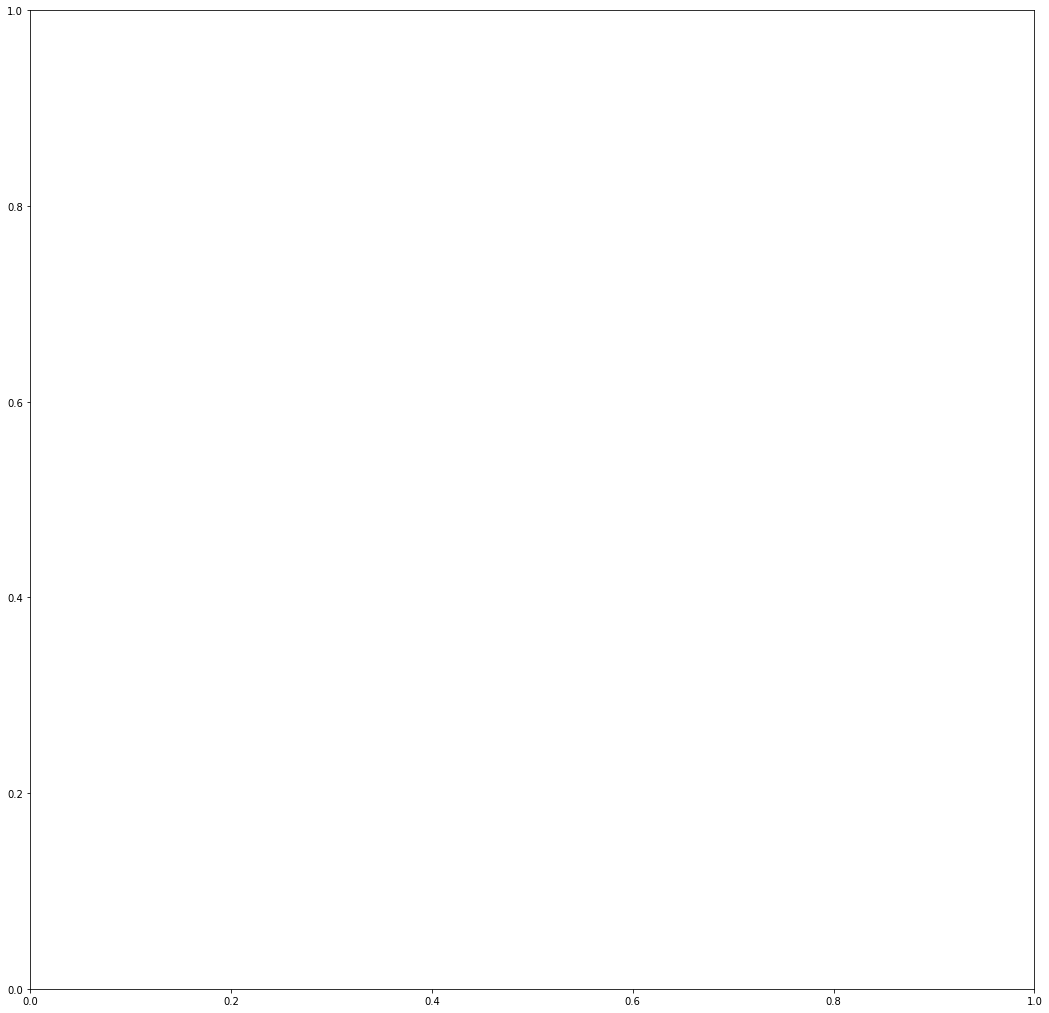

In [17]:
fig, ax = plt.subplots(figsize=(18,18))

v = transformed['cluster']

ax.scatter(transformed['x'], transformed['y'], s=300, c=v, zorder=2, alpha=0.4)

texts = []
for x, y, s in zip(transformed.x, transformed.y, transformed.name):
    texts.append(plt.text(x, y, s))
adjust_text((texts) , arrowprops=dict(arrowstyle="->", color='b', lw=0.5));

# Label axis
ax.set_ylabel("Principal Component 2",fontsize=12)
ax.set_xlabel("Principal Component 1",fontsize=12);

# ax.savefig("newc_man_kmeans.jpg");